In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv("../experimental_data/250M_losses_v1.2.csv")
data

,update_step,likely-wave-442 - _step,likely-wave-442 - _step__MIN,likely-wave-442 - _step__MAX,likely-wave-442 - loss,likely-wave-442 - loss__MIN,likely-wave-442 - loss__MAX,silvery-paper-370 - _step,silvery-paper-370 - _step__MIN,silvery-paper-370 - _step__MAX,...,volcanic-sun-327 - _step__MAX,volcanic-sun-327 - loss,volcanic-sun-327 - loss__MIN,volcanic-sun-327 - loss__MAX,grateful-wildflower-277 - _step,grateful-wildflower-277 - _step__MIN,grateful-wildflower-277 - _step__MAX,grateful-wildflower-277 - loss,grateful-wildflower-277 - loss__MIN,grateful-wildflower-277 - loss__MAX
0,1,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3,...,1,10.437500,10.437500,10.437500,12,12,12,10.500000,10.500000,10.500000
1,2,NaN,NaN,NaN,NaN,NaN,NaN,6,6,6,...,2,10.500000,10.500000,10.500000,24,24,24,10.500000,10.500000,10.500000
2,3,NaN,NaN,NaN,NaN,NaN,NaN,9,9,9,...,3,10.437500,10.437500,10.437500,36,36,36,10.500000,10.500000,10.500000
3,4,NaN,NaN,NaN,NaN,NaN,NaN,12,12,12,...,4,10.437500,10.437500,10.437500,48,48,48,10.500000,10.500000,10.500000
4,5,NaN,NaN,NaN,NaN,NaN,NaN,15,15,15,...,5,10.437500,10.437500,10.437500,60,60,60,10.500000,10.500000,10.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19997,479928.0,479928.0,479928.0,3.015625,3.015625,3.015625,59991,59991,59991,...,19997,3.390625,3.390625,3.390625,239964,239964,239964,3.125000,3.125000,3.125000
19997,19998,479952.0,479952.0,479952.0,3.031250,3.031250,3.031250,59994,59994,59994,...,19998,3.484375,3.484375,3.484375,239976,239976,239976,3.359375,3.359375,3.359375
19998,19999,479976.0,479976.0,479976.0,3.218750,3.218750,3.218750,59997,59997,59997,...,19999,3.265625,3.265625,3.265625,239988,239988,239988,2.984375,2.984375,2.984375
19999,20000,480000.0,480000.0,480000.0,3.328125,3.328125,3.328125,60000,60000,60000,...,20000,3.281250,3.281250,3.281250,240000,240000,240000,3.046875,3.046875,3.046875


In [24]:
data.columns

Index(['update_step', 'likely-wave-442 configs/llama_250m.json PEFT: true',
       'likely-wave-442 configs/llama_250m.json PEFT: true__MIN',
       'likely-wave-442 configs/llama_250m.json PEFT: true__MAX',
       'volcanic-sun-327 configs/llama_71m.json PEFT: false',
       'volcanic-sun-327 configs/llama_71m.json PEFT: false__MIN',
       'volcanic-sun-327 configs/llama_71m.json PEFT: false__MAX',
       'grateful-wildflower-277 configs/llama_250m.json PEFT: false',
       'grateful-wildflower-277 configs/llama_250m.json PEFT: false__MIN',
       'grateful-wildflower-277 configs/llama_250m.json PEFT: false__MAX'],
      dtype='object')

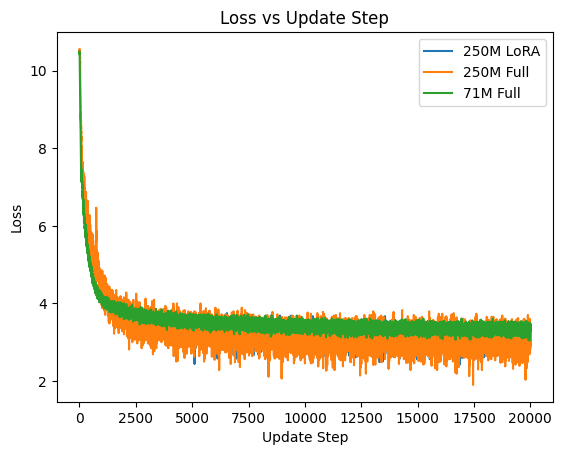

In [27]:
x = data["update_step"]

# pleasant-puddle-358 true configs/llama_250m.json
# new best run: likely-wave-442
y_250M_lora = data["likely-wave-442 - loss"]
y_250M_full = data["grateful-wildflower-277 - loss"]
y_71M_full = data["volcanic-sun-327 - loss"]
# y_250M_lora = data["likely-wave-442 configs/llama_250m.json PEFT: true"]
# y_250M_full = data["grateful-wildflower-277 configs/llama_250m.json PEFT: false"]
# y_71M_full = data["volcanic-sun-327 configs/llama_71m.json PEFT: false"]

plt.plot(x, y_250M_lora, label="250M LoRA")
plt.plot(x, y_250M_full, label="250M Full")
plt.plot(x, y_71M_full, label="71M Full")
plt.legend()
plt.xlabel("Update Step")
plt.ylabel("Loss")
plt.title("Loss vs Update Step")
plt.show()

In [ ]:
data.loc[743]

In [ ]:
data[(data.update_step < 1000) & (data.update_step > 743)]["grateful-wildflower-277 - loss"].tolist()

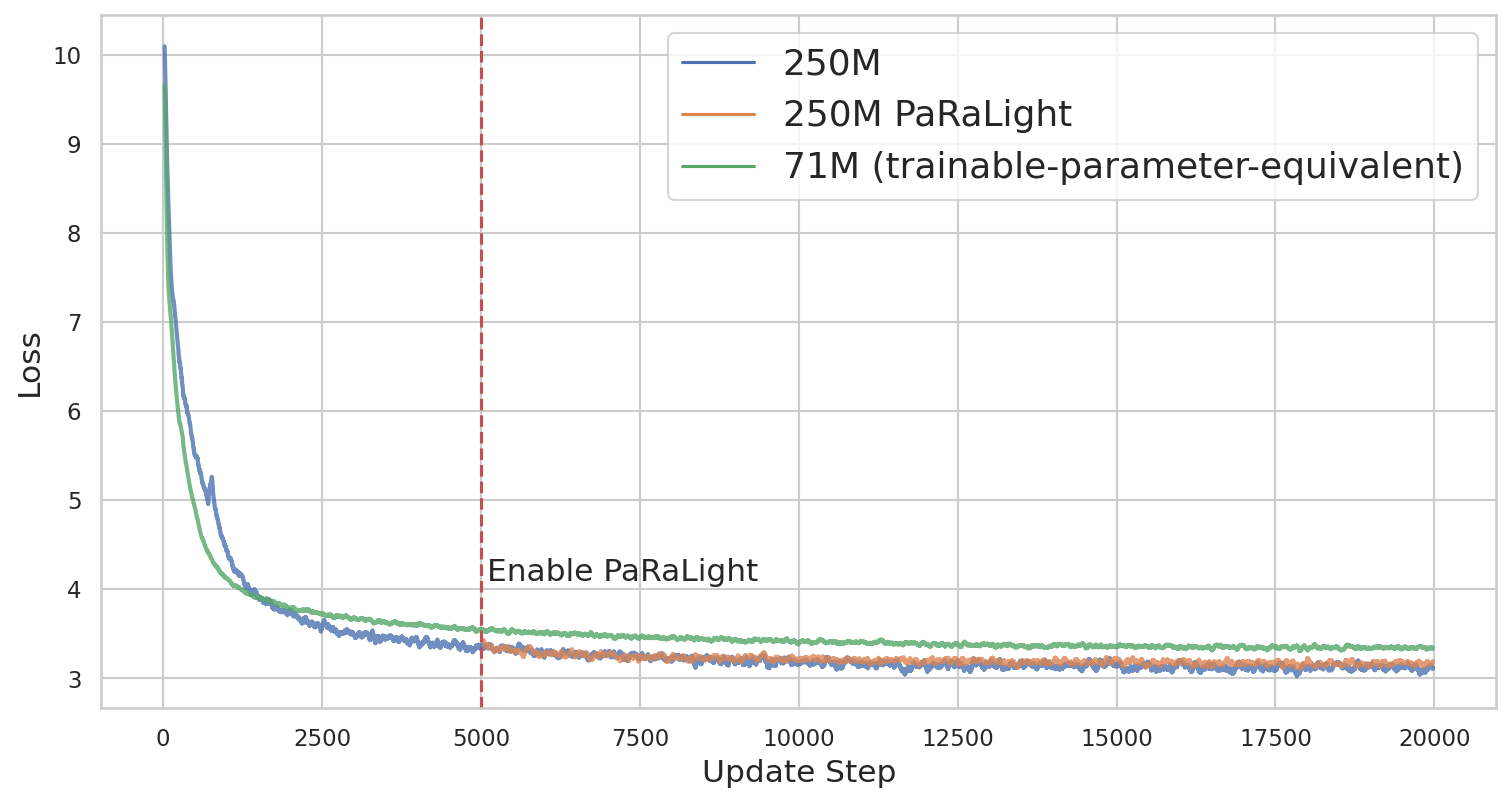

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Setting the overall aesthetics.
sns.set_theme(style="whitegrid")

data = pd.read_csv("../experimental_data/250M_losses.csv")
# delete 744th row
data = data.drop([742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752])
window = 50  # set the window size that suits your data
data_smooth = data.rolling(window).mean()

x = data_smooth["update_step"]

# pleasant-puddle-358 true configs/llama_250m.json
y_250M_lora = data_smooth["pleasant-puddle-358 - loss"]
y_250M_full = data_smooth["grateful-wildflower-277 - loss"]
y_71M_full = data_smooth["volcanic-sun-327 - loss"]

# Create a dataframe
df = pd.DataFrame({
    "250M": y_250M_full,
    "Step": x,
    "250M PaRaLight": y_250M_lora,
    "71M (trainable-parameter-equivalent)": y_71M_full
})

# Melt the dataframe to have a column for models and their corresponding loss
df_melt = df.melt('Step', var_name='Models', value_name='Loss')

# Create the plot using seaborn
plt.figure(figsize=(12, 6), dpi=150)  # Set the figure size
loss_plot = sns.lineplot(x='Step', y='Loss', hue='Models', data=df_melt, alpha=0.8, linewidth=2)

# Setting the title and labels
# plt.title('Loss vs Update Step', fontsize=20)
plt.xlabel('Update Step', fontsize=15)
plt.ylabel('Loss', fontsize=15)

# Set the fontsize and location of the legend
plt.legend(fontsize='x-large', title_fontsize='40', loc='upper right')

# add vertical line at 5K
plt.axvline(x=5000, color='r', linestyle='--')
# add text saying "Enable PaRaLight"
plt.text(5100, 4.1, 'Enable PaRaLight', fontsize=15)
plt.show()

In [ ]:
df.shape[0]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Setting the overall aesthetics.
sns.set_theme(style="whitegrid")

data = pd.read_csv("../experimental_data/250M_losses.csv")
# delete rows 742 to 752
data = data.drop(list(range(742, 753)))
window = 50  # set the window size that suits your data
data_smooth = data.rolling(window).mean()

x = data_smooth["update_step"]

# pleasant-puddle-358 true configs/llama_250m.json
y_250M_lora = data_smooth["pleasant-puddle-358 - loss"]
y_250M_full = data_smooth["grateful-wildflower-277 - loss"]
y_71M_full = data_smooth["volcanic-sun-327 - loss"]

# Create a dataframe
df = pd.DataFrame({
    "250M": y_250M_full,
    "Step": x,
    "250M PaRaLight": y_250M_lora,
    "71M (trainable-parameter-equivalent)": y_71M_full
})

# Melt the dataframe to have a column for models and their corresponding loss
df_melt = df.melt('Step', var_name='Models', value_name='Loss')

# Create the plot using seaborn
fig, ax1 = plt.subplots(figsize=(10, 5), dpi=150)  # Set the figure size

color = 'black'
ax1.set_xlabel('Update Step', fontsize=15)
ax1.set_ylabel('Loss', color=color, fontsize=15)
loss_plot = sns.lineplot(x='Step', y='Loss', hue='Models', data=df_melt, alpha=0.8, linewidth=2, ax=ax1)
ax1.tick_params(axis='y', labelcolor=color)

# Set the fontsize and location of the legend
# alpha 1.0
ax1.legend(fontsize='x-large', title_fontsize='40', loc='upper right', bbox_to_anchor=(1, 0.95))

# add vertical line at 5K
ax1.axvline(x=5000, color='r', linestyle='--')
# add text saying "Enable PaRaLight"
ax1.text(5100, 4.3, 'Enable PaRaLight', fontsize=15)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

# black
color = 'black'
ax2.set_ylabel('Trainable Parameters', color=color, fontsize=15)  # we already handled the x-label with ax1
ax2.plot(df["Step"], [250] * df.shape[0], color="b", label='250M Parameters')
ax2.plot(df["Step"], ([None] * 5000) + [98] * (df.shape[0] - 5000), color=color, label='98M Parameters (PaRaLight)')
ax2.plot(df["Step"], [71] * df.shape[0], color=color, label='71M Parameters')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

# logy
ax1.set_yscale('log')
# ax2.set_yscale('log')

# limit x 0 20K
ax1.set_xlim([0, 20000])
ax2.set_xlim([0, 20000])

# lim ax2 y 0 300
ax2.set_ylim([0, 300])
plt.show()

In [ ]:
data.columns

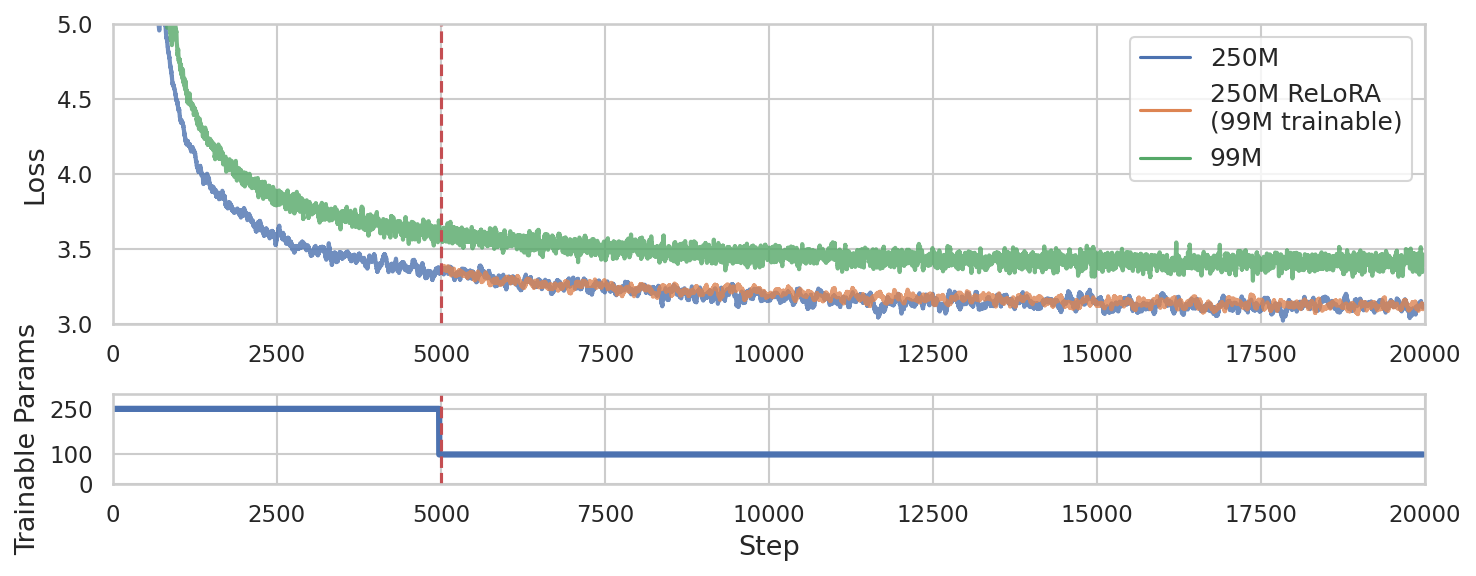

In [28]:
# https://wandb.ai/guitaricet/peft_pretraining/reports/Paper-figures--Vmlldzo0Mzg4Mzc3/edit
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.gridspec as gridspec

# Setting the overall aesthetics.
sns.set_theme(style="whitegrid")

data = pd.read_csv("../experimental_data/250M_losses_v1.2.csv")
window = 50  # set the window size that suits your data
data_smooth = data.rolling(window).mean()

data_smooth2 = data.rolling(10).mean()

x = data_smooth["update_step"]

# pleasant-puddle-358 true configs/llama_250m.json
y_250M_lora = data_smooth["likely-wave-442 - loss"]
y_250M_full = data_smooth["grateful-wildflower-277 - loss"]
y_71M_full = data_smooth["volcanic-sun-327 - loss"]
y_99M_full = data_smooth2["silvery-paper-370 - loss"]

# Create a dataframe
df = pd.DataFrame({
    "250M": y_250M_full,
    "Step": x,
    "250M ReLoRA\n(99M trainable)": y_250M_lora,
    # "71M": y_71M_full,
    "99M": y_99M_full,
})

# Melt the dataframe to have a column for models and their corresponding loss
df_melt = df.melt('Step', var_name='Models', value_name='Loss')

# Create the subplots
fig = plt.figure(figsize=(10, 4), dpi=150)
# reduce space between first and second row
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 0.6])  # 0 height for the empty plot to serve as a spacer
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

# Plot the loss
loss_plot = sns.lineplot(x='Step', y='Loss', hue='Models', data=df_melt, alpha=0.8, linewidth=2, ax=ax1)

# Setting the title and labels for loss plot
ax1.set_ylabel('Loss', fontsize=13)
# ax1.set_yscale('log')  # log scale for loss
ax1.set_xlim([0, 20000])  # limit x-axis
ax1.set_ylim([3, 5])  # limit x-axis
ax1.legend(fontsize='medium', title_fontsize='30', loc='upper right')#, bbox_to_anchor=(1, 0.95))  # Set the fontsize and location of the legend
ax1.axvline(x=5000, color='r', linestyle='--')  # add vertical line at 5K
# ax1.text(5100, 4.3, 'Enable PaRaLight', fontsize=13)  # add text saying "Enable PaRaLight"

# remove x-label
ax1.set_xlabel('')

# Plot the trainable parameters
# ax2.plot(df["Step"], ([250] * 5000) + ([None] * (df.shape[0] - 500), color="b", label='250M Parameters')
# ax2.plot(df["Step"], ([None] * 5000) + [98] * (df.shape[0] - 5000), color="black", label='98M Parameters (PaRaLight)')
# ax2.plot(df["Step"], [71] * df.shape[0], color="black", label='71M Parameters')
ax2.plot(df["Step"], ([250] * 5000) + [98] * (df.shape[0] - 5000), label='98M Parameters (PaRaLight)',
         linewidth=3)
ax2.axvline(x=5000, color='r', linestyle='--')  # add vertical line at 5K
# add ticks
ax2.set_yticks([0, 100, 250])

# Setting the labels for trainable parameters plot
ax2.set_xlabel('Step', fontsize=13)
ax2.set_ylabel('Trainable Params', fontsize=13)
ax2.set_ylim([0, 300])  # limit y-axis

# Set the fontsize and location of the legend
# ax2.legend(fontsize='x-large', title_fontsize='40', loc='upper right', bbox_to_anchor=(1, 0.95))

ax1.set_xlim([0, 20000])
ax2.set_xlim([0, 20000])

plt.tight_layout()  # Adjust layout to ensure non-overlapping
plt.show

# save pdf
fig.savefig('250M_loss.pdf', bbox_inches='tight')